In [200]:
import numpy as np
import random 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

In [227]:
# parametri fisici oscillatore
m = 1.
omega = 1.
#k_B = 1.38065156*10**(-23)
k_B = 1.
T = 50
r = 0.001 #0.05
beta = 1/(k_B*T)

In [202]:
# Definizione della distribuzione di Gibbs
def gibbs_distribution(q, p):
    return np.exp(-beta*((p**2)/(2*m) + (m*omega**2)*(q**2)/2))

def gibbs_distribution_nonlinear(q, p):
    return np.exp(-beta*((p**2)/(2*m) + (m*omega**2)*(q**2)/2 + r*(q**4)/4))

In [203]:
# Definizione della proposta di transizione (scelta semplice per dimostrazione)
def proposal(x, y):
    x_new = x + np.random.normal()
    y_new = y + np.random.normal()
    return x_new, y_new

In [326]:
# Parametri dell'algoritmo di campionamento
num_samples = 5000
burn_in = 100

In [327]:
# Inizializzazione campionamento
current_q, current_p = 0.0, 0.0
samples = []

In [328]:
# Ciclo di campionamento delle q e delle p
for _ in range(num_samples + burn_in):
    proposed_q, proposed_p = proposal(current_q, current_p)
    
    acceptance_ratio = min(1, gibbs_distribution_nonlinear(proposed_q, proposed_p) / gibbs_distribution_nonlinear(current_q, current_p))
    
    if np.random.uniform() < acceptance_ratio:
        current_q, current_p = proposed_q, proposed_p
    
    if _ >= burn_in:
        samples.append((current_q, current_p))

In [329]:
# Estrazione dei campioni di x e y
sampled_q = [sample[0] for sample in samples]
sampled_p = [sample[1] for sample in samples]

sampled_q = np.array(sampled_q) 
sampled_p = np.array(sampled_p) 

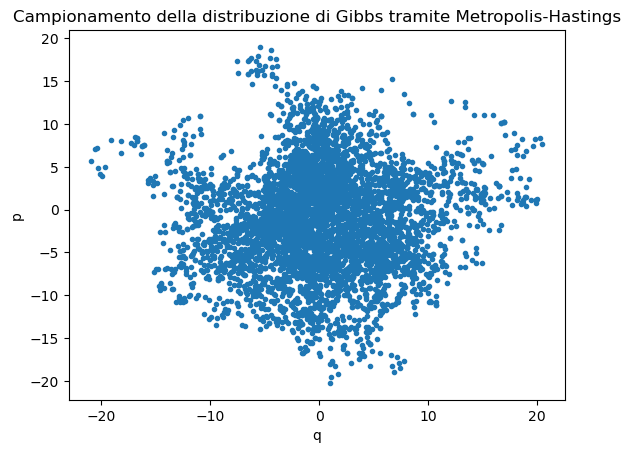

In [330]:
# Visualizzazione dei risultati
plt.scatter(sampled_q, sampled_p, marker='.')
plt.xlabel('q')
plt.ylabel('p')
plt.title('Campionamento della distribuzione di Gibbs tramite Metropolis-Hastings')
plt.show()

In [331]:
len(sampled_p) == len(sampled_q)

True

In [332]:
np.mean(sampled_p*sampled_p/m)

38.06257445699353

In [333]:
np.mean((m*omega*omega)*sampled_q*sampled_q)

37.17293973925078

In [334]:
np.mean((m*omega*omega)*sampled_q*sampled_q + r*sampled_q*sampled_q*sampled_q*sampled_q)

42.02362345136934

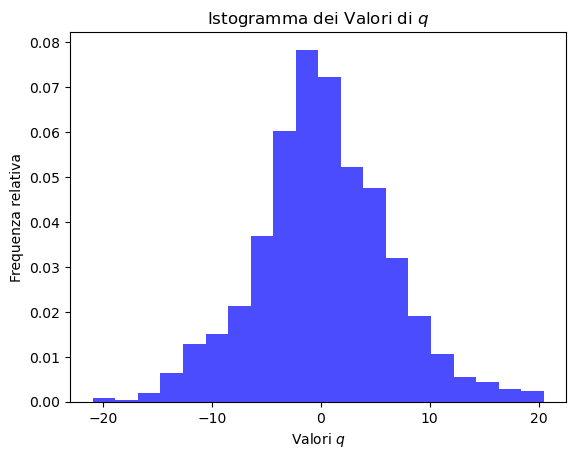

In [335]:
# Crea l'istogramma
plt.hist(sampled_q, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $q$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $q$')

# Mostra il plot
plt.show()

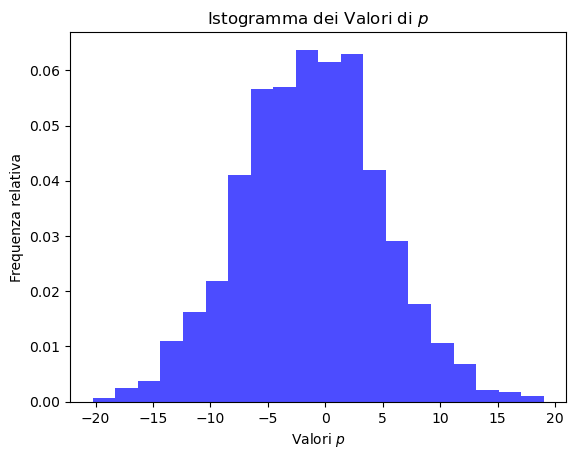

In [336]:
# Crea l'istogramma
plt.hist(sampled_p, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $p$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $p$')

# Mostra il plot
plt.show()

In [337]:
kinetic = (sampled_p*sampled_p)/(2*m)
# potential = (m*omega*omega/2)*(sampled_q*sampled_q)
potential = (m*omega*omega/2)*(sampled_q*sampled_q) + (r/4)*(sampled_q*sampled_q)*(sampled_q*sampled_q)
energy = kinetic + potential

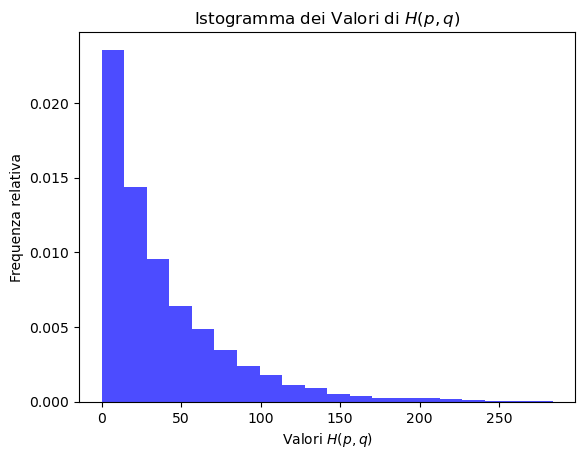

In [338]:
# Crea l'istogramma
plt.hist(energy, bins=20, density=True, alpha=0.7, color='blue')  # `bins` definisce il numero di bin nell'istogramma

# Aggiungi etichette e titolo
plt.xlabel('Valori $H(p,q)$')
plt.ylabel('Frequenza relativa')
plt.title('Istogramma dei Valori di $H(p,q)$')

# Mostra il plot
plt.show()

In [346]:
# Intervallo di tempo
t_span = np.linspace(0, 10, 2*10000)
dt = t_span[1] - t_span[0]

# medie di ensemble
q_ensemble = np.zeros(len(t_span))
p_ensemble = np.zeros(len(t_span))

questo algoritmo sembra funzionare ma appena metto la media di ensemble inizia a dissipare

In [347]:
for realizzazione in range(0, num_samples):

    # Inizializzazione
    p = sampled_p[realizzazione]
    q = sampled_q[realizzazione]

    # Liste per memorizzare i risultati
    p_values = [p]
    q_values = [q]

    # Risoluzione numerica usando il metodo Leapfrog
    for t in t_span[1:]:
        # Aggiornamento delle velocità a metà passo
        p += -0.5*dt*(m*omega**2 * q + r*q**3)
        # Aggiornamento delle posizioni a intero passo
        q += dt*p/m
        # Aggiornamento delle velocità a metà passo
        p += -0.5 * dt *(m*omega**2 * q + r*q**3)
    
        p_values.append(p)
        q_values.append(q)
    
    # converto in numpy array
    p_values = np.array(p_values)
    q_values = np.array(q_values)
    
    # sommo all'ensamble
    p_ensemble += p_values
    q_ensemble += q_values

In [348]:
p_ensemble /= num_samples
q_ensemble /= num_samples

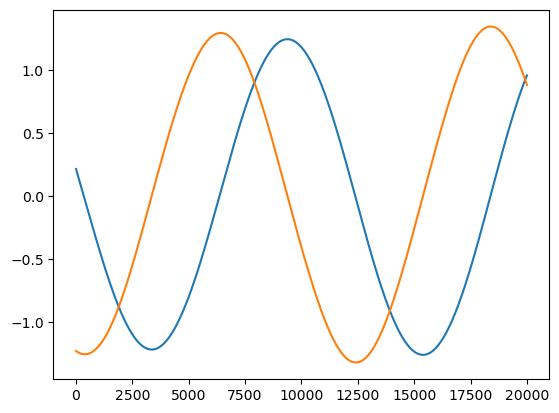

In [349]:
plt.plot(q_ensemble)
plt.plot(p_ensemble)

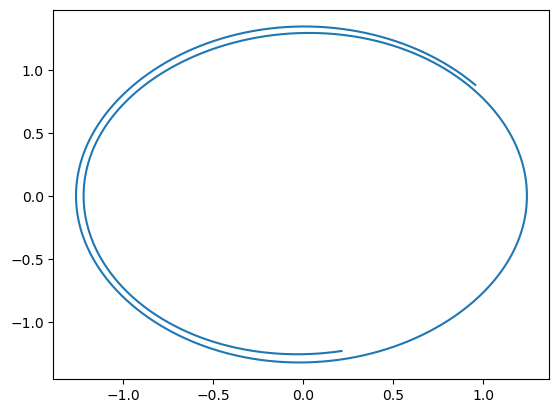

In [350]:
plt.plot(q_ensemble, p_ensemble)

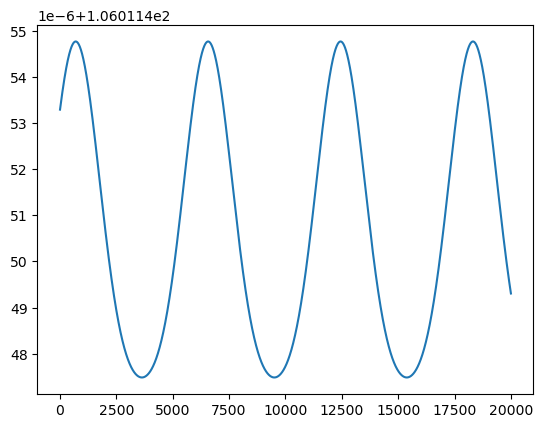

In [351]:
plt.plot((p_values**2)/(2*m) + ((m*omega**2)/2)*q_values**2 + (r/4)*q_values**4)